In [40]:
import pandas as pd
df = pd.read_excel("fake_blood_demand.xlsx")

In [41]:
df.head()

,Name,Blood Group,Units,Last donation date
0,narnv,A+,2,2023-05-25
1,vneosbn,B-,4,2023-05-26
2,cjnfevogbp,AB+,1,2023-05-27
3,cndfdb,O+,12,2023-05-28
4,dndvm,A+,4,2023-05-29


In [42]:
df_pred = pd.DataFrame({'Date': pd.Series(dtype='object'),
                   'A+': pd.Series(dtype='int'),
                   'A-': pd.Series(dtype='int'),
                   'B+': pd.Series(dtype='int'),
                   'B-': pd.Series(dtype='int'),
                   'AB+': pd.Series(dtype='int'),
                   'AB-': pd.Series(dtype='int'),
                   'O+': pd.Series(dtype='int'),
                   'O-': pd.Series(dtype='int')})

In [43]:
df_pred

,Date,A+,A-,B+,B-,AB+,AB-,O+,O-


In [44]:
d = df["Last donation date"].iloc[-1]
from datetime import timedelta
import datetime

dtlist = []
zl = []
for i in range(365):
  d = d+timedelta(days=1)
  dtlist.append(d)
  zl.append(0)

df_pred["Date"]=dtlist
df_pred["A+"]=zl
df_pred["A-"]=zl
df_pred["B+"]=zl
df_pred["B-"]=zl
df_pred["AB+"]=zl
df_pred["AB-"]=zl
df_pred["O+"]=zl
df_pred["O-"]=zl

In [45]:
for ind in df.index:
  d=df["Last donation date"][ind]
  d+=timedelta(days=15)
  lastDate = df_pred["Date"].iloc[-1]
  while d<=lastDate:
    for i in df_pred.index:
      if(df_pred["Date"][i]==d):
        if(i>=15):
          df_pred[df["Blood Group"][ind]][i]+=(df['Units'][ind]+df_pred[df["Blood Group"][ind]][i-15])
        else:
          df_pred[df["Blood Group"][ind]][i]+=(df['Units'][ind]+df_pred[df["Blood Group"][ind]][i])
        break
    
    d+=timedelta(days=15)

bglist = ["A+","A-","B+","B-","AB+","AB-","O+","O-"]
for ind in df_pred.index:
  for a in bglist:
    if(df_pred[a][ind]==0 and ind):
      df_pred[a][ind]=df_pred[a][ind-1]


df_pred


<ipython-input-45-259b748178dd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred[df["Blood Group"][ind]][i]+=(df['Units'][ind]+df_pred[df["Blood Group"][ind]][i])
<ipython-input-45-259b748178dd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred[df["Blood Group"][ind]][i]+=(df['Units'][ind]+df_pred[df["Blood Group"][ind]][i-15])
<ipython-input-45-259b748178dd>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred[a][

,Date,A+,A-,B+,B-,AB+,AB-,O+,O-
0,2023-06-09,2,0,0,0,0,0,0,0
1,2023-06-10,2,0,0,4,0,0,0,0
2,2023-06-11,2,0,0,4,1,0,0,0
3,2023-06-12,2,0,0,4,1,0,12,0
4,2023-06-13,4,0,0,4,1,0,12,0
...,...,...,...,...,...,...,...,...,...
360,2024-06-03,50,96,120,96,48,96,96,96
361,2024-06-04,50,96,120,100,48,96,96,96
362,2024-06-05,50,96,120,100,25,96,96,96
363,2024-06-06,50,96,120,100,25,96,300,96


In [46]:
import matplotlib.pyplot as plt


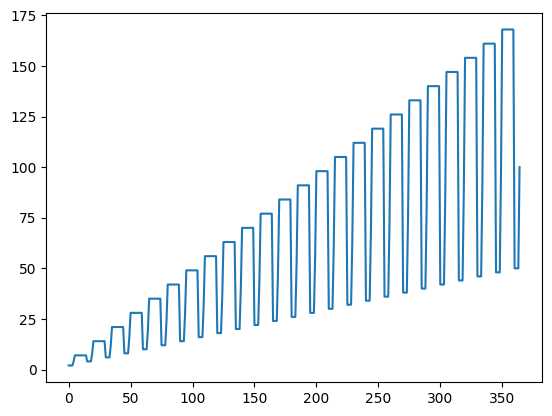

In [47]:

plt.plot(df_pred["A+"])